In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('insurance claim amount.csv')

In [3]:
df.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [4]:
df.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [6]:
drop=['Customer','State Code','Effective To Date','Policy','Claim Amount']

In [7]:
for m in drop:
    df.drop(m,inplace=True,axis=1)

In [8]:
df.head()

,Country,State,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,US,Kansas,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,32,5,0,1,Corporate Auto,Collision,Agent,384.811147,Two-Door Car,Medsize
1,US,Nebraska,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,13,42,0,8,Personal Auto,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,US,Oklahoma,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,18,38,0,2,Personal Auto,Collision,Agent,566.472247,Two-Door Car,Medsize
3,US,Missouri,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,18,65,0,7,Corporate Auto,Collision,Call Center,529.881344,SUV,Medsize
4,US,Kansas,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,12,44,0,1,Personal Auto,Collision,Agent,138.130879,Four-Door Car,Medsize


In [13]:
df.shape

(9134, 21)

In [43]:
pd.DataFrame(df.groupby('Vehicle Class')['Total Claim Amount'].sum()/(1.625485e+06+ 1.842371e+05+2.010246e+05+1.022953e+06+2.701436e+05+6.611239e+05)*100).sort_values('Total Claim Amount',ascending=False)

,Total Claim Amount
Vehicle Class,
Four-Door Car,40.996169
SUV,25.799787
Two-Door Car,16.674134
Sports Car,6.813263
Luxury SUV,5.070020
Luxury Car,4.646624


In [42]:
pd.DataFrame(df['Vehicle Class'].value_counts()/(9134)*100)

,Vehicle Class
Four-Door Car,50.591198
Two-Door Car,20.648128
SUV,19.662798
Sports Car,5.298883
Luxury SUV,2.014451
Luxury Car,1.784541


# four door cars have an almost normal ratio between the number of cars and the percentage of the claim amount.

# whereas SUVs are lower in number but there claim amount is relatively higher when compared to other classes, and same goes for luxury SUVs and Cars.

In [48]:
df.groupby('Gender')['Total Claim Amount'].sum()/(1.923085e+06+2.041882e+06)*100

Gender
F    48.501930
M    51.498072
Name: Total Claim Amount, dtype: float64

In [49]:
df['Gender'].value_counts()/(4658+4476)

F    0.509963
M    0.490037
Name: Gender, dtype: float64

# males have fewer number but there claim amounts are higher suggesting that more damage was done and claimed. 

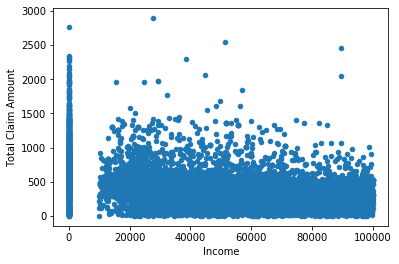

In [24]:
df.plot.scatter('Income','Total Claim Amount')

# Scatter plot suggests that people with 0 income has higher claims as compared to people with higher salaries, although the difference is very slight but could be an indication that there may be false cliam by the users.

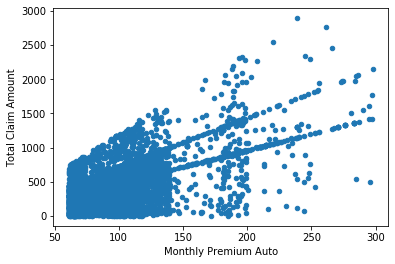

In [61]:
df.plot.scatter('Monthly Premium Auto','Total Claim Amount')

# Strong correlation between the claim amount and the monthly premium. 

In [34]:
df.groupby('Policy Type')['Total Claim Amount'].sum()/(df['Total Claim Amount'].sum())*100

Policy Type
Corporate Auto    21.358422
Personal Auto     74.442333
Special Auto       4.199246
Name: Total Claim Amount, dtype: float64

In [31]:
df['Policy Type'].value_counts()/(len(df['Policy Type']))*100

Personal Auto     74.315743
Corporate Auto    21.545873
Special Auto       4.138384
Name: Policy Type, dtype: float64

# ratio between all three classes seems normal. 

In [29]:
df.groupby('State')['Total Claim Amount'].sum()

State
Iowa        1.126266e+06
Kansas      3.482022e+05
Missouri    1.379131e+06
Nebraska    7.243905e+05
Oklahoma    3.869780e+05
Name: Total Claim Amount, dtype: float64

# state of Missouri has the highest claim amount and Nebraska has the lowest. This could be beneficial in determining the premium price based on the geographical location.

In [35]:
df['Country'].nunique()

1

In [36]:
df.drop('Country',inplace=True,axis=1)

# since all the data is from US so I have decided to drop country column. 

In [38]:
from sklearn.preprocessing import LabelEncoder

In [54]:
le=LabelEncoder()

In [50]:
df.dtypes

State                             object
Response                          object
Coverage                          object
Education                         object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Claim Reason                      object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [51]:
df.columns

Index(['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Income', 'Location Code', 'Marital Status',
       'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Claim Reason', 'Sales Channel',
       'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [52]:
transform=['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus','Gender', 'Location Code', 'Marital Status','Policy Type', 'Claim Reason', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']

In [55]:
for m in transform:
    df[m]=le.fit_transform(df[m].values.reshape(-1,1))

C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [57]:
df.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,1,0,0,0,1,0,56274,1,1,69,32,5,0,1,0,0,0,384.811147,5,1
1,3,0,1,0,4,0,0,1,2,94,13,42,0,8,1,3,0,1131.464935,0,1
2,4,0,2,0,1,0,48767,1,1,108,18,38,0,2,1,0,0,566.472247,5,1
3,2,0,0,0,4,1,0,1,1,106,18,65,0,7,0,0,2,529.881344,3,1
4,1,0,0,0,1,1,43836,0,2,73,12,44,0,1,1,0,0,138.130879,0,1


In [62]:
corr=df.corr()

In [65]:
plt.rcParams['figure.figsize']=(20,30)

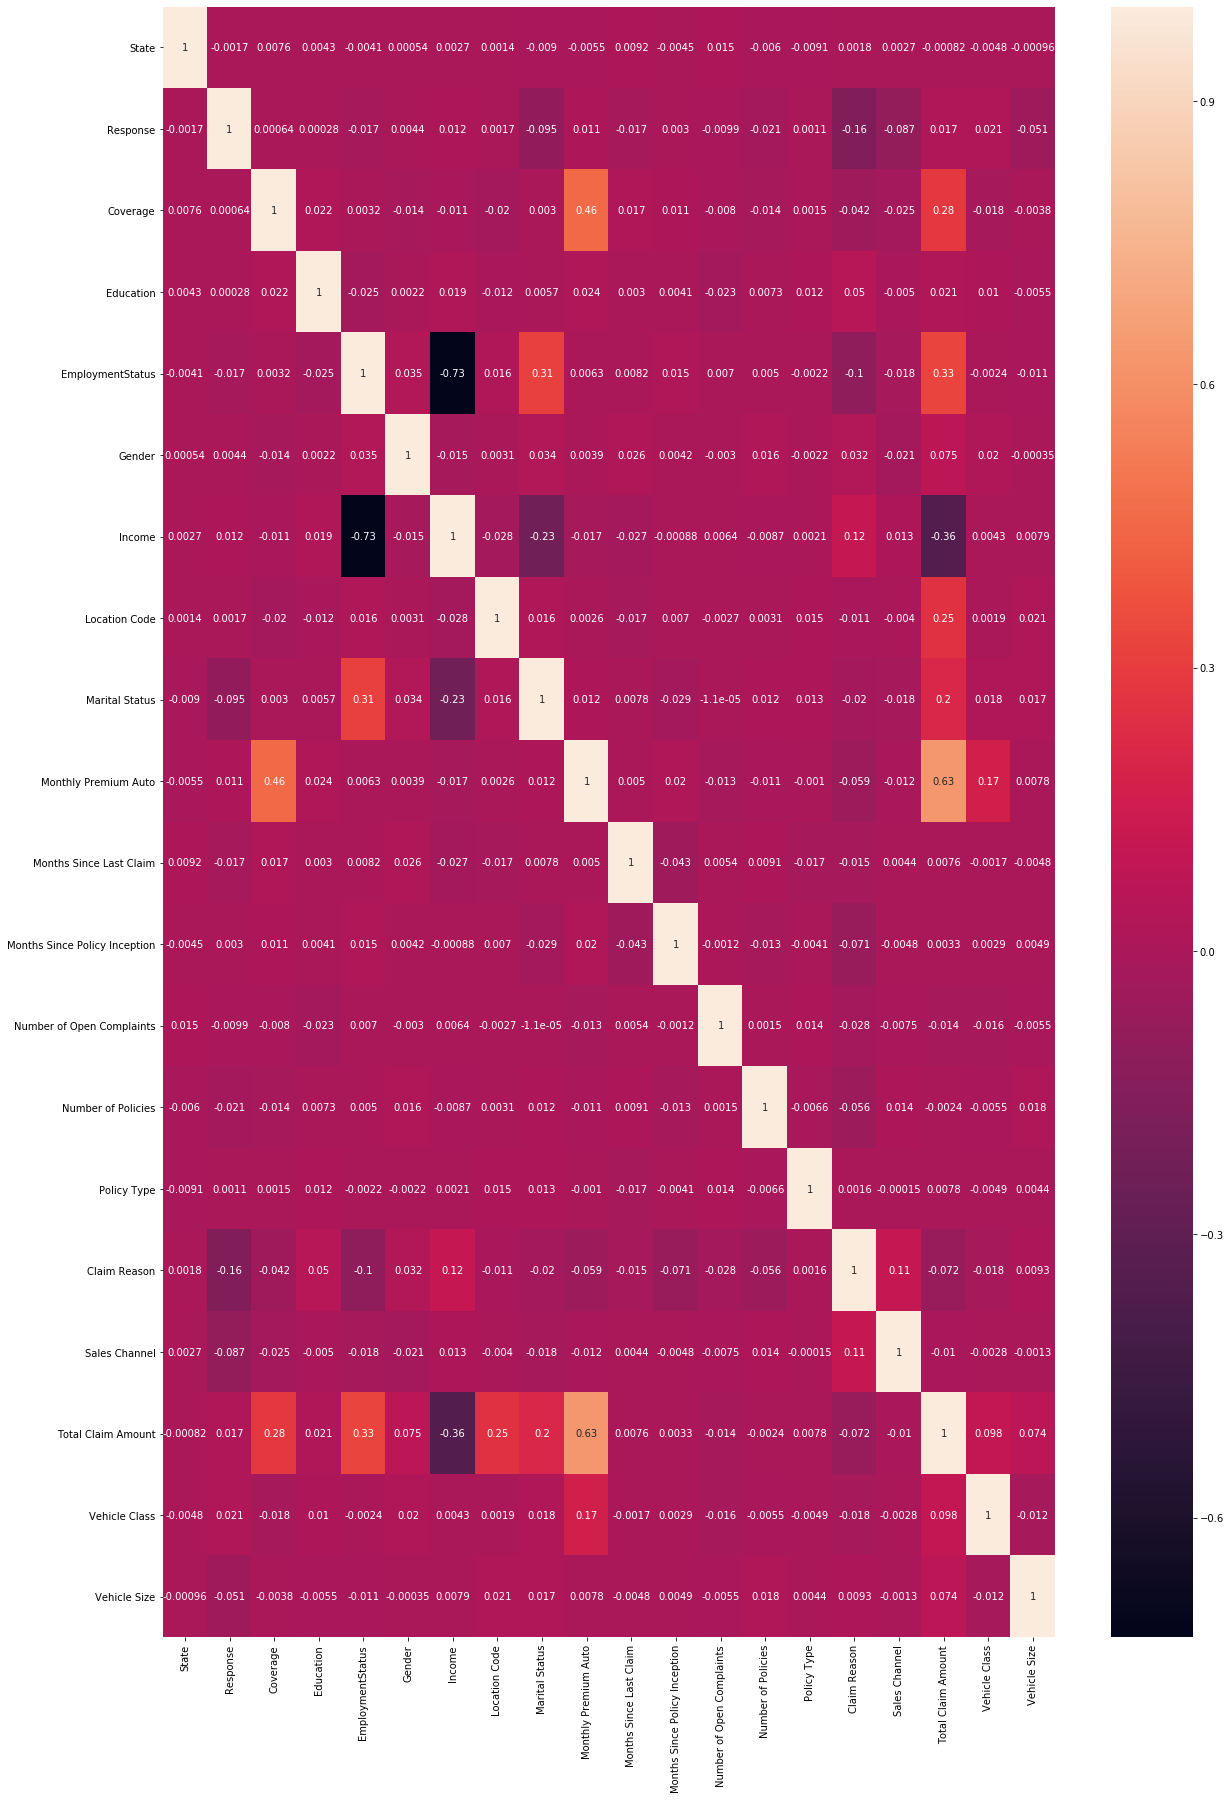

In [66]:
sns.heatmap(corr,annot=True)

# above observations show there is a storng correlation between income and employment status, therefore I will drop Employment status.

In [68]:
df.drop('EmploymentStatus',inplace=True,axis=1)

In [110]:
from sklearn.preprocessing import StandardScaler

In [111]:
ss=StandardScaler()
col=df.columns
for m in col:
    df[m]=ss.fit_transform(df[m].values.reshape(-1,1))

In [112]:
df.head()

,State,Response,Coverage,Education,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,-0.550690,-0.408822,-0.732899,-1.124597,-0.980269,0.612827,0.034524,-0.188771,-0.703925,1.678099,-1.543287,-0.42225,-0.822648,-1.735273,-0.946485,-1.031138,-0.169640,1.499181,-0.166682
1,0.973322,-0.408822,0.791999,-1.124597,-0.980269,-1.239617,0.034524,1.381572,0.022691,-0.208186,-0.217334,-0.42225,2.106160,0.365732,1.851312,-1.031138,2.400737,-0.912924,-0.166682
2,1.735328,-0.408822,2.316897,-1.124597,-0.980269,0.365710,0.034524,-0.188771,0.429596,0.288205,-0.360680,-0.42225,-0.404247,0.365732,-0.946485,-1.031138,0.455734,1.499181,-0.166682
3,0.211316,-0.408822,-0.732899,-1.124597,1.020128,-1.239617,0.034524,-0.188771,0.371467,0.288205,0.606907,-0.42225,1.687759,-1.735273,-0.946485,0.839080,0.329769,0.534339,-0.166682
4,-0.550690,-0.408822,-0.732899,-1.124597,1.020128,0.203390,-1.616461,1.381572,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648,0.365732,-0.946485,-1.031138,-1.018843,-0.912924,-0.166682


In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import cross_val_score,train_test_split

In [114]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [115]:
x=df.drop('Total Claim Amount',axis=1)

In [116]:
x.shape

(9134, 18)

In [117]:
y=df.iloc[:,-3].values.reshape(-1,1)

In [118]:
y

array([[-0.16963969],
       [ 2.400737  ],
       [ 0.45573376],
       ...,
       [ 1.22793667],
       [ 0.88511256],
       [-0.22200449]])

In [119]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [120]:
lr=LinearRegression()

In [121]:
lr.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [170]:
lr.score(xtrain,ytrain)

0.6036291887447476

In [169]:
lr.score(xtest,ytest)

0.5922974088038971

In [172]:
r2_score(lr.predict(xtest),ytest)

0.29313405818246585

In [171]:
(mean_squared_error(lr.predict(xtest),ytest))*1/3

0.13632100323866148

In [125]:
lr.coef_

array([[ 5.43518616e-03,  3.19280221e-02, -1.03906063e-02,
         1.45660056e-02,  6.42823079e-02, -3.08610281e-01,
         2.40254391e-01,  1.13998426e-01,  6.31551321e-01,
        -1.54606096e-03, -5.41510168e-03, -4.76629845e-04,
        -6.34484827e-03,  5.94342961e-03,  7.46021113e-03,
         8.40682549e-03, -1.35518789e-02,  6.35927539e-02]])

In [181]:
rd,ls=Ridge(),Lasso()

In [182]:
model=[rd,ls]

In [184]:
for m in model:
    m.fit(xtrain,ytrain)
    print(m,m.score(xtrain,ytrain))
    print(m,m.score(xtest,ytest))
    print(m,r2_score(m.predict(xtest),ytest))
    print(m,(mean_squared_error(m.predict(xtest),ytest))*1/3)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) 0.6036291739589997
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) 0.5922974703035462
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) 0.2929325195792045
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) 0.13632098267540274
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) 0.0
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=

In [126]:
dtr=DecisionTreeRegressor()

In [127]:
dtr.fit(xtrain,ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [128]:
dtr.score(xtrain,ytrain)

0.9999999997291611

In [129]:
dtr.score(xtest,ytest)

0.6751678788422757

In [130]:
r2_score(dtr.predict(xtest),ytest)

0.6894059600424043

In [176]:
(mean_squared_error(dtr.predict(xtest),ytest))*1/3

0.1086121148027344

In [131]:
rfr=RandomForestRegressor()

In [177]:
rfr.fit(xtrain,ytrain)
print(rfr.score(xtrain,ytrain))
print(rfr.score(xtest,ytest))
print(r2_score(rfr.predict(xtest),ytest))
print((mean_squared_error(rfr.predict(xtest),ytest))*1/3)

0.96855612291554
0.8193852355116144
0.7902864511442973
0.06039104589092111


In [133]:
knn=KNeighborsRegressor()

In [178]:
knn.fit(xtrain,ytrain)
print(knn.score(xtrain,ytrain))
print(knn.score(xtest,ytest))
print(r2_score(knn.predict(xtest),ytest))
print((mean_squared_error(knn.predict(xtest),ytest))*1/3)

0.8008875805927401
0.702389783840221
0.4824133727212343
0.09951009416435562


# from above predictions Random Forest Regressor seems to working the best.

In [138]:
ada=AdaBoostRegressor(base_estimator=rfr)

In [179]:
ada.fit(xtrain,ytrain)
print(ada.score(xtrain,ytrain))
print(ada.score(xtest,ytest))
print(r2_score(ada.predict(xtest),ytest))
print((mean_squared_error(ada.predict(xtest),ytest))*1/3)

0.990916224623685
0.8323282945337647
0.7998760184950703
0.05606335499815446


In [140]:
cv=cross_val_score(ada,x,y,cv=10)

In [141]:
cv.mean()

0.838309313003341

In [142]:
cv.std()

0.008583245001049039

# ADA has boosted the performance of the model, now let us check the importance of the columns and drop the ones having low importance.

In [143]:
imp=rfr.feature_importances_

In [144]:
col=x.columns

In [153]:
imp_cols=pd.DataFrame({'imp':imp,'col':col})

In [155]:
imp_cols.sort_values('imp')

,imp,col
2,0.002113,Coverage
4,0.003066,Gender
1,0.003450,Response
16,0.004841,Vehicle Class
13,0.005344,Policy Type
17,0.005927,Vehicle Size
11,0.006006,Number of Open Complaints
3,0.006908,Education
14,0.007320,Claim Reason
15,0.007644,Sales Channel


In [156]:
drop=['Coverage','Gender','Response','Vehicle Class','Policy Type','Vehicle Size']

In [180]:
for m in drop:
    df.drop(m,inplace=True,axis=1)

In [186]:
x=df.drop('Total Claim Amount',axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(x,y)


In [187]:
ada.fit(xtrain,ytrain)

AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                       criterion='mse',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=10,
                                                       n_jobs=None,
                                                       oob_score=False,
                        

In [188]:
ada.score(xtrain,ytrain)


0.9905525797691032

In [189]:
ada.score(xtest,ytest)

0.8355200992068932

In [190]:
r2_score(ada.predict(xtest),ytest)

0.8116853325025685

In [192]:
cv=cross_val_score(ada,x,y,cv=10)
cv.mean()


0.8362762187327484

In [193]:
cv.std()

0.008928631075756853

In [194]:
import pickle


In [195]:
model_loan=pickle.dumps('ada')